## The Samuelson Multiplier--Accelerator Model

The model combines the consumption function 

$$ C_t = a Y_{t-1} + \gamma $$

with the investment accelerator

$$ I_t = b (Y_{t-1} - Y_{t-2})  $$

and the national income identity

$$ Y_t = C_t + I_t + G_t $$


These equations lead to

$$ Y_t = \rho_1 Y_{t-1} + \rho_2 Y_{t-2} + \gamma + G_t$$

where $\rho_1 = (a+b)$ and $\rho_2 = -b$.  

We suppose that $\{G_t\}$ is iid and standard normal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
import random

In [2]:
def sim_samuelson(y_0=70, y_1=70, α=0.8, β=0.7, γ=10.0, sim_length=100):

    # Useful constants
    ρ_1 = α + β
    ρ_2 = -β
    
    Y = np.empty(sim_length)
    Y[0] = y_0
    Y[1] = y_1
    
    for t in range(sim_length-2):
        Y[t+2] = ρ_1 * Y[t+1] + ρ_2 * Y[t] + γ + randn()

    return Y


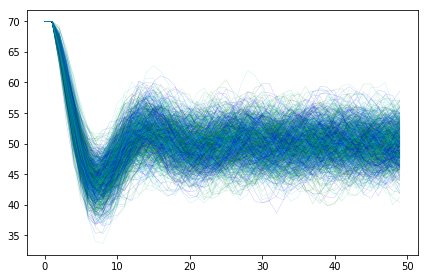

In [3]:
sim_length=50
fig, ax = plt.subplots(figsize=(7, 4.5))

ax.legend()

for i in range(800):
    rcolor = random.choice(('c', 'g', 'b'))
    X = sim_samuelson(sim_length=sim_length)
    ax.plot(X, color=rcolor, alpha=0.2, lw=0.5)

plt.show()

### Part 2: Marginal Distributions

Now let's look at the marginal distribution $\psi_T$ for some fixed $T$.

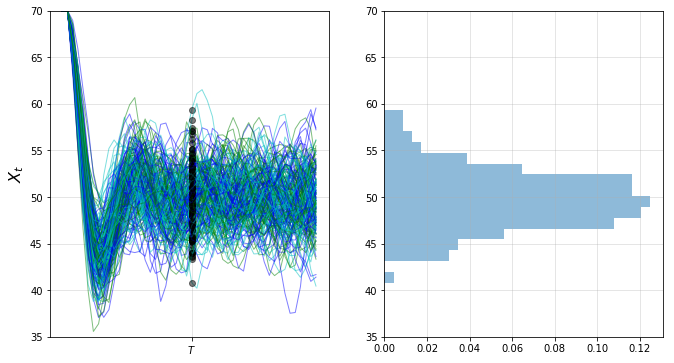

In [4]:
T = 25
M = 200

fig, axes = plt.subplots(1, 2, figsize=(11, 6))


for ax in axes:
    ax.grid(alpha=0.4)
ymin, ymax = 35, 70
ax = axes[0]

ax.set_ylim(ymin, ymax)
ax.set_ylabel('$X_t$', fontsize=16)
ax.vlines((T,), -1.5, 1.5)

ax.set_xticks((T,))
ax.set_xticklabels((r'$T$',))

sample = []
for i in range(M):
    rcolor = random.choice(('c', 'g', 'b'))
    X = sim_samuelson(sim_length=2 * T)
    ax.plot(X, color=rcolor, lw=1, alpha=0.5)
    ax.plot((T,), (X[T],), 'ko', alpha=0.5)
    sample.append(X[T])

axes[1].set_ylim(ymin, ymax)

axes[1].hist(sample, 
             bins=16, 
             density=True, 
             orientation='horizontal', 
             histtype='bar',
             alpha=0.5)

plt.show()

### Part 3: Asymptotic Stationarity and Ergodicity

This model is asymptotically stationary, with a unique stationary distribution.  We can see convergence to the sationary distribution in the figures below.

In [5]:
M = 5000  # Number of paths
T = 501
X = np.empty((M, T))

for m in range(M):
    X[m, :] = sim_samuelson(sim_length=T)

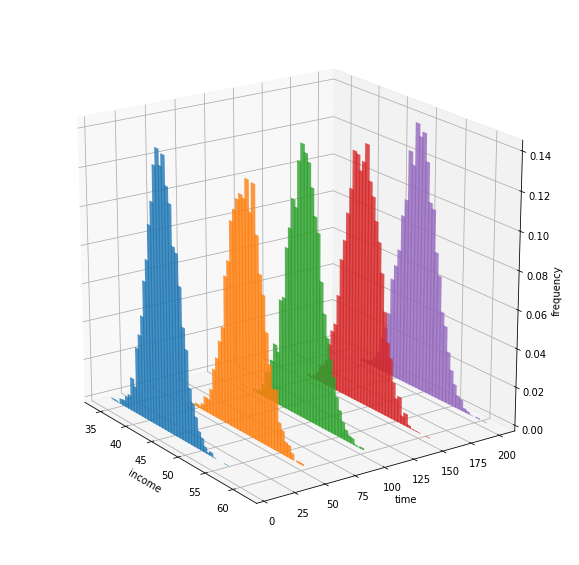

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

sample_dates = 8, 50, 100, 150, 200

nbins = 40
for t in sample_dates:

    hist, bins = np.histogram(X[:, t], bins=nbins, normed=True)
    xs = (bins[:-1] + bins[1:])/2

    ax.bar(xs, hist, zs=t, zdir='y', alpha=0.8)

ax.set_xlabel('income')
ax.set_ylabel('time')
ax.set_zlabel('frequency')
ax.view_init(elev=20., azim=-35)
plt.show()